
-  **행성 데이터 설정**:
-  각 행성의 궤도 반지름(단위: 백만 km), 공전 속도, 그리고 크기를 설정합니다.
-  <samp>orbit_radii</samp>: 각 행성의 태양으로부터의 거리.
-  <samp>orbit_speeds</samp>: 각 행성의 공전 속도.
-  <samp>planet_sizes</samp>: 행성의 상대적인 크기(지구를 기준으로).
-  **3D 플롯 설정**:
-  <samp>figure</samp>, <samp>hold on</samp>, <samp>axis equal</samp> 등의 명령어를 사용하여 3D 플롯을 설정하고, 태양을 중심으로 행성들이 공전하는 장면을 나타냅니다.
-  **태양 그리기**:
-  <samp>sphere</samp> 함수를 사용하여 태양을 구 모양으로 그립니다.
-  **행성 그리기**:
-  각 행성을 구 형태로 표현하며, 초기 위치를 궤도 반지름에 맞춰 설정합니다.
-  각 행성의 초기 위치는 태양을 중심으로 원형 궤도 상에 배치됩니다.
-  **애니메이션**:
-  <samp>for</samp> 루프를 통해 시간이 흐름에 따라 각 행성이 태양 주위를 공전하는 모습을 시각화합니다.
-  행성의 위치는 공전 속도에 따라 계산되며, <samp>set</samp> 명령어를 사용하여 행성의 위치를 업데이트합니다.
-  <samp>drawnow</samp>를 사용해 각 프레임마다 화면을 업데이트하여 애니메이션처럼 보이게 합니다


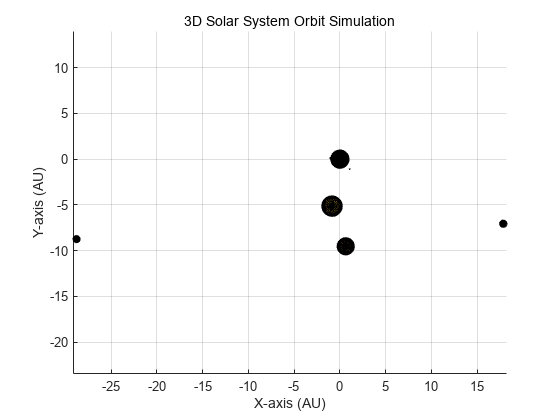

In [1]:
% 태양계 행성의 기본 설정
planets = {'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'};
orbit_radii = [57.9, 108.2, 149.6, 227.9, 778.3, 1427, 2871, 4497];  % 행성의 궤도 반지름 (단위: 백만 km)
orbit_speeds = [47.87, 35.02, 29.78, 24.13, 13.07, 9.69, 6.81, 5.43];  % 공전 속도 (단위: km/s)
planet_sizes = [0.383, 0.949, 1, 0.532, 11.21, 9.45, 4.01, 3.88];  % 지구 반지름을 1로 한 상대적인 크기

% MATLAB의 시간 설정 (애니메이션)
time_steps = 0:0.01:2*pi;  % 시간 단계 (2*pi가 1년이라고 가정)

% 3D 플롯 설정
figure;
hold on;
axis equal;
grid on;
xlabel('X-axis (AU)');
ylabel('Y-axis (AU)');
zlabel('Z-axis (AU)');
title('3D Solar System Orbit Simulation');

% 태양 그리기
[solar_x, solar_y, solar_z] = sphere(30);  % 태양을 구로 표현
surf(solar_x, solar_y, solar_z, 'FaceColor', 'yellow');  % 태양의 크기 및 색

% 행성들의 초기 위치와 궤적 설정
planet_objects = gobjects(1, length(planets));

for i = 1:length(planets)
    % 각 행성의 궤도 반지름에 따른 초기 위치 설정 (XY 평면에 투영)
    orbit_radius = orbit_radii(i) / 149.6;  % 천문 단위(AU)로 변환 (지구-태양 거리)

    % 행성 궤도 초기 위치
    x = orbit_radius * cos(0);
    y = orbit_radius * sin(0);
    z = 0;

    % 행성 그리기
    [px, py, pz] = sphere(20);  % 구로 행성 만들기
    planet_size = planet_sizes(i) * 0.1;  % 행성 크기 (시각적 크기)
    planet_objects(i) = surf(planet_size * px + x, planet_size * py + y, planet_size * pz + z);
end

% 애니메이션: 시간에 따라 행성들이 공전하는 것을 시각화
for t = time_steps
    for i = 1:length(planets)
        % 각 행성의 궤도 속도에 따라 새로운 위치 계산
        orbit_radius = orbit_radii(i) / 149.6;  % AU로 변환
        x = orbit_radius * cos(orbit_speeds(i) * t);
        y = orbit_radius * sin(orbit_speeds(i) * t);
        z = 0;  % 단순화된 2D 궤도

        % 행성 위치 업데이트
        planet_size = planet_sizes(i) * 0.1;
        set(planet_objects(i), 'XData', planet_size * px + x, 'YData', planet_size * py + y, 'ZData', planet_size * pz + z);
    end

    % 플롯 업데이트 (애니메이션)
    drawnow;
end

-  **<samp>text</samp>** **함수 사용** : <samp>text</samp> 명령어를 사용하여 각 행성의 이름을 표시합니다. 각 행성의 초기 위치에 이름을 추가한 후, 애니메이션 중에 행성이 이동할 때마다 이름도 함께 이동하도록 설정했습니다.
-  **행성 이름 위치 업데이트**:
-  각 행성의 위치가 업데이트될 때, 해당 행성의 이름도 함께 위치가 업데이트됩니다. <samp>set</samp> 함수를 사용하여 행성 이름의 위치를 업데이트합니다.


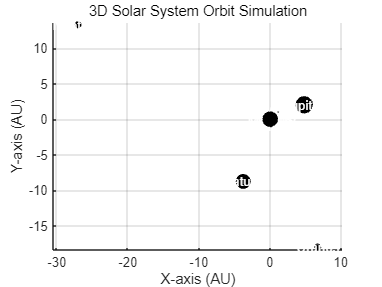

In [2]:
% 태양계 행성의 기본 설정
planets = {'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'};
orbit_radii = [57.9, 108.2, 149.6, 227.9, 778.3, 1427, 2871, 4497];  % 행성의 궤도 반지름 (단위: 백만 km)
orbit_speeds = [47.87, 35.02, 29.78, 24.13, 13.07, 9.69, 6.81, 5.43];  % 공전 속도 (단위: km/s)
planet_sizes = [0.383, 0.949, 1, 0.532, 11.21, 9.45, 4.01, 3.88];  % 지구 반지름을 1로 한 상대적인 크기

% MATLAB의 시간 설정 (애니메이션)
time_steps = 0:0.01:2*pi;  % 시간 단계 (2*pi가 1년이라고 가정)

% 3D 플롯 설정
figure;
hold on;
axis equal;
grid on;
xlabel('X-axis (AU)');
ylabel('Y-axis (AU)');
zlabel('Z-axis (AU)');
title('3D Solar System Orbit Simulation');

% 태양 그리기
[solar_x, solar_y, solar_z] = sphere(30);  % 태양을 구로 표현
surf(solar_x, solar_y, solar_z, 'FaceColor', 'yellow');  % 태양의 크기 및 색

% 행성들의 초기 위치와 궤적 설정
planet_objects = gobjects(1, length(planets));
planet_texts = gobjects(1, length(planets));

for i = 1:length(planets)
    % 각 행성의 궤도 반지름에 따른 초기 위치 설정 (XY 평면에 투영)
    orbit_radius = orbit_radii(i) / 149.6;  % 천문 단위(AU)로 변환 (지구-태양 거리)

    % 행성 궤도 초기 위치
    x = orbit_radius * cos(0);
    y = orbit_radius * sin(0);
    z = 0;

    % 행성 그리기
    [px, py, pz] = sphere(20);  % 구로 행성 만들기
    planet_size = planet_sizes(i) * 0.1;  % 행성 크기 (시각적 크기)
    planet_objects(i) = surf(planet_size * px + x, planet_size * py + y, planet_size * pz + z);

    % 행성 이름 표시
    planet_texts(i) = text(x, y, z + planet_size, planets{i}, 'FontSize', 10, 'Color', 'white', 'HorizontalAlignment', 'center');
end

% 애니메이션: 시간에 따라 행성들이 공전하는 것을 시각화
for t = time_steps
    for i = 1:length(planets)
        % 각 행성의 궤도 속도에 따라 새로운 위치 계산
        orbit_radius = orbit_radii(i) / 149.6;  % AU로 변환
        x = orbit_radius * cos(orbit_speeds(i) * t);
        y = orbit_radius * sin(orbit_speeds(i) * t);
        z = 0;  % 단순화된 2D 궤도

        % 행성 위치 업데이트
        planet_size = planet_sizes(i) * 0.1;
        set(planet_objects(i), 'XData', planet_size * px + x, 'YData', planet_size * py + y, 'ZData', planet_size * pz + z);

        % 행성 이름 위치 업데이트 (행성의 새로운 위치에 맞춰 이동)
        set(planet_texts(i), 'Position', [x, y, z + planet_size]);
    end

    % 플롯 업데이트 (애니메이션)
    drawnow;
end

-  **행성 공전 경사각 반영**: 각 행성의 궤도 경사각을 적용했습니다. 경사각은 <samp>tilt_angles</samp> 배열에 저장되어 있으며, 이 값에 따라 각 행성의 궤도가 3D로 경사져 공전하도록 설정합니다.
-  **자전 추가**: 각 행성의 자전 주기(<samp>rotation_periods</samp>)를 사용해 자전을 시각적으로 표현합니다. <samp>rotate</samp> 함수를 사용하여 행성이 자전축을 중심으로 회전하게 했습니다.
-  **실제 천문학적 데이터 사용**:
-  **공전 주기**는 실제 행성의 공전 주기(일 단위)로 설정되었습니다(<samp>orbit_periods</samp>).
-  **자전 주기**도 실제 데이터에 기반하여 설정되었습니다(<samp>rotation_periods</samp>).


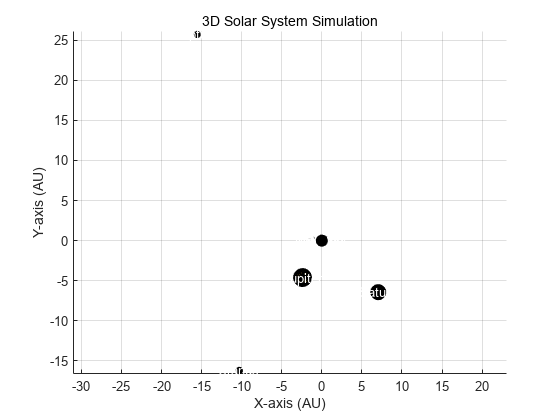

In [3]:
% 행성 데이터 설정 (천문학적 데이터)
planets = {'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'};
orbit_radii = [57.9, 108.2, 149.6, 227.9, 778.3, 1427, 2871, 4497] * 1e6;  % km 단위
orbit_periods = [88, 224.7, 365.25, 687, 4333, 10759, 30685, 60190];  % 공전 주기 (일)
rotation_periods = [58.6, 243, 0.99, 1.03, 0.41, 0.45, 0.72, 0.67];  % 자전 주기 (일)
tilt_angles = [7, 3.4, 0, 1.9, 1.3, 2.5, 0.8, 1.8];  % 경사각 (도)

planet_sizes = [0.383, 0.949, 1, 0.532, 11.21, 9.45, 4.01, 3.88];  % 상대적인 크기 (지구 기준)
sun_radius = 696340;  % 태양 반지름 (km)

% 애니메이션 및 시간 설정
time_speedup = 100;  % 시간 가속 비율 (공전 및 자전 속도를 빠르게)
timestep = 0.1;  % 시간 단위 (초)

% 3D 플롯 설정
figure;
hold on;
axis equal;
grid on;
xlabel('X-axis (AU)');
ylabel('Y-axis (AU)');
zlabel('Z-axis (AU)');
title('3D Solar System Simulation');

% 태양 그리기
[sun_x, sun_y, sun_z] = sphere(30);  % 태양을 구로 표현
surf(sun_x * sun_radius / 1e6, sun_y * sun_radius / 1e6, sun_z * sun_radius / 1e6, 'FaceColor', 'yellow');

% 행성 초기 위치 및 궤도 설정
planet_objects = gobjects(1, length(planets));
planet_texts = gobjects(1, length(planets));

for i = 1:length(planets)
    % 각 행성의 궤도 반지름 설정 (천문 단위로 변환)
    orbit_radius = orbit_radii(i) / 1.496e8;  % AU로 변환
    % 행성의 초기 위치 (경사각 반영)
    theta = deg2rad(tilt_angles(i));  % 경사각 (라디안으로 변환)

    % 행성 궤도 초기 위치 (원형 궤도로 시작)
    x = orbit_radius * cos(0);
    y = orbit_radius * sin(0) * cos(theta);
    z = orbit_radius * sin(0) * sin(theta);

    % 행성 그리기
    [px, py, pz] = sphere(20);  % 구로 행성 만들기
    planet_size = planet_sizes(i) * 0.1;  % 행성 크기 (시각적 크기)
    planet_objects(i) = surf(planet_size * px + x, planet_size * py + y, planet_size * pz + z);

    % 행성 이름 표시
    planet_texts(i) = text(x, y, z + planet_size, planets{i}, 'FontSize', 10, 'Color', 'white', 'HorizontalAlignment', 'center');
end

% 애니메이션: 시간에 따라 행성들이 공전하고 자전하는 것을 시각화
for t = 0:timestep:1000
    for i = 1:length(planets)
        % 각 행성의 공전 궤적 (경사각 반영)
        orbit_radius = orbit_radii(i) / 1.496e8;  % AU로 변환
        theta = deg2rad(tilt_angles(i));  % 경사각

        % 공전 주기 기반 궤도 위치
        x = orbit_radius * cos(t * time_speedup / orbit_periods(i) * 2 * pi);
        y = orbit_radius * sin(t * time_speedup / orbit_periods(i) * 2 * pi) * cos(theta);
        z = orbit_radius * sin(t * time_speedup / orbit_periods(i) * 2 * pi) * sin(theta);

        % 행성 자전 (단순화: 자전 주기에 따라 회전)
        rotation_angle = mod(t * time_speedup / rotation_periods(i) * 360, 360);  % 자전 각도

        % 행성 위치 및 자전 업데이트
        planet_size = planet_sizes(i) * 0.1;
        rotate(planet_objects(i), [0 0 1], rotation_angle, [x y z]);  % 자전 추가
        set(planet_objects(i), 'XData', planet_size * px + x, 'YData', planet_size * py + y, 'ZData', planet_size * pz + z);

        % 행성 이름 위치 업데이트
        set(planet_texts(i), 'Position', [x, y, z + planet_size]);
    end

    % 플롯 업데이트 (애니메이션)
    drawnow;
end

-  **행성 궤도 3D 시각화**:
-  <samp>plot3</samp> 함수를 사용하여 각 행성의 궤도를 3D로 그립니다.
-  경사각에 따라 각 궤도가 3D 공간에서 기울어져 표시됩니다.
-  **자전축 화살표 표시**:
-  <samp>quiver3</samp> 함수를 사용하여 각 행성의 자전축을 화살표로 시각화합니다. 자전축은 빨간색 화살표로 표시되며, 자전하는 모습을 시각적으로 더 명확하게 보여줍니다.
-  **실제 천문학적 데이터 사용**:
-  각 행성의 궤도와 자전 주기를 실제 데이터에 기반하여 설정하고, 이를 바탕으로 공전과 자전 애니메이션을 표현합니다.


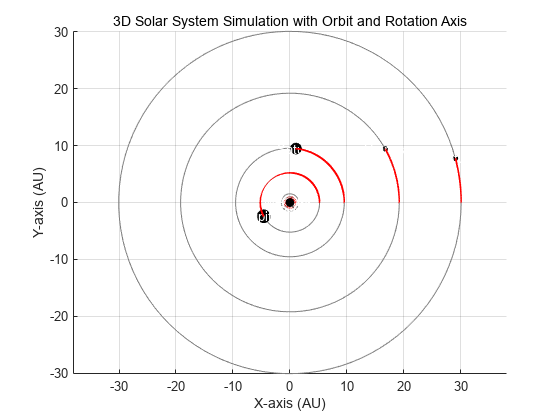

In [4]:
% 행성 데이터 설정 (천문학적 데이터)
planets = {'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'};
orbit_radii = [57.9, 108.2, 149.6, 227.9, 778.3, 1427, 2871, 4497] * 1e6;  % km 단위
orbit_periods = [88, 224.7, 365.25, 687, 4333, 10759, 30685, 60190];  % 공전 주기 (일)
rotation_periods = [58.6, 243, 0.99, 1.03, 0.41, 0.45, 0.72, 0.67];  % 자전 주기 (일)
tilt_angles = [7, 3.4, 0, 1.9, 1.3, 2.5, 0.8, 1.8];  % 경사각 (도)

planet_sizes = [0.383, 0.949, 1, 0.532, 11.21, 9.45, 4.01, 3.88];  % 상대적인 크기 (지구 기준)
sun_radius = 696340;  % 태양 반지름 (km)

% 애니메이션 및 시간 설정
time_speedup = 100;  % 시간 가속 비율 (공전 및 자전 속도를 빠르게)
timestep = 0.1;  % 시간 단위 (초)

% 3D 플롯 설정
figure;
hold on;
axis equal;
grid on;
xlabel('X-axis (AU)');
ylabel('Y-axis (AU)');
zlabel('Z-axis (AU)');
title('3D Solar System Simulation with Orbit and Rotation Axis');

% 태양 그리기
[sun_x, sun_y, sun_z] = sphere(30);  % 태양을 구로 표현
surf(sun_x * sun_radius / 1e6, sun_y * sun_radius / 1e6, sun_z * sun_radius / 1e6, 'FaceColor', 'yellow');

% 행성 초기 위치 및 궤도 설정
planet_objects = gobjects(1, length(planets));
planet_texts = gobjects(1, length(planets));
orbit_lines = gobjects(1, length(planets));

for i = 1:length(planets)
    % 각 행성의 궤도 반지름 설정 (천문 단위로 변환)
    orbit_radius = orbit_radii(i) / 1.496e8;  % AU로 변환
    % 행성의 초기 위치 (경사각 반영)
    theta = deg2rad(tilt_angles(i));  % 경사각 (라디안으로 변환)

    % 행성 궤도 초기 위치 (원형 궤도로 시작)
    x = orbit_radius * cos(0);
    y = orbit_radius * sin(0) * cos(theta);
    z = orbit_radius * sin(0) * sin(theta);

    % 행성 그리기
    [px, py, pz] = sphere(20);  % 구로 행성 만들기
    planet_size = planet_sizes(i) * 0.1;  % 행성 크기 (시각적 크기)
    planet_objects(i) = surf(planet_size * px + x, planet_size * py + y, planet_size * pz + z);

    % 행성 이름 표시
    planet_texts(i) = text(x, y, z + planet_size, planets{i}, 'FontSize', 10, 'Color', 'white', 'HorizontalAlignment', 'center');

    % 3D 궤도를 표시할 궤도 라인 추가
    orbit_lines(i) = plot3(orbit_radius * cos(linspace(0, 2*pi, 100)), ...
                           orbit_radius * sin(linspace(0, 2*pi, 100)) * cos(theta), ...
                           orbit_radius * sin(linspace(0, 2*pi, 100)) * sin(theta), 'Color', [0.5, 0.5, 0.5]);
end

% 애니메이션: 시간에 따라 행성들이 공전하고 자전하는 것을 시각화
for t = 0:timestep:1000
    for i = 1:length(planets)
        % 각 행성의 공전 궤적 (경사각 반영)
        orbit_radius = orbit_radii(i) / 1.496e8;  % AU로 변환
        theta = deg2rad(tilt_angles(i));  % 경사각

        % 공전 주기 기반 궤도 위치
        x = orbit_radius * cos(t * time_speedup / orbit_periods(i) * 2 * pi);
        y = orbit_radius * sin(t * time_speedup / orbit_periods(i) * 2 * pi) * cos(theta);
        z = orbit_radius * sin(t * time_speedup / orbit_periods(i) * 2 * pi) * sin(theta);

        % 행성 자전 (단순화: 자전 주기에 따라 회전)
        rotation_angle = mod(t * time_speedup / rotation_periods(i) * 360, 360);  % 자전 각도

        % 행성 위치 및 자전 업데이트
        planet_size = planet_sizes(i) * 0.1;
        rotate(planet_objects(i), [0 0 1], rotation_angle, [x y z]);  % 자전 추가
        set(planet_objects(i), 'XData', planet_size * px + x, 'YData', planet_size * py + y, 'ZData', planet_size * pz + z);

        % 행성 이름 위치 업데이트
        set(planet_texts(i), 'Position', [x, y, z + planet_size]);

        % 자전축 화살표 표시 (간단화)
        quiver3(x, y, z, 0, 0, planet_size * 2, 'r', 'LineWidth', 1.5);
    end

    % 플롯 업데이트 (애니메이션)
    drawnow;
end

-  **<samp>view(3)</samp>**: 그래프를 3D로 보는 기본 뷰를 설정합니다. 이를 통해 좌표축을 포함한 3D 플롯이 입체적으로 나타납니다.
-  **<samp>rotate3d on</samp>**: 사용자가 마우스를 사용하여 3D 그래프를 회전할 수 있도록 기능을 활성화합니다.
-  **축 레이블과 그래프 설정**:
-  <samp>xlabel</samp>, <samp>ylabel</samp>, <samp>zlabel</samp>로 각 축을 명확하게 설정하여 3차원 공간감을 높였습니다.
-  그래프 제목을 추가하여 전체적인 시각적 구성을 향상시켰습니다.
-  **자전축을 화살표로 시각화**:
-  각 행성의 자전축을 <samp>quiver3</samp>로 화살표를 그려 표시하였습니다.

In [5]:
% 행성 데이터 설정 (천문학적 데이터)
planets = {'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'};
orbit_radii = [57.9, 108.2, 149.6, 227.9, 778.3, 1427, 2871, 4497] * 1e6;  % km 단위
orbit_periods = [88, 224.7, 365.25, 687, 4333, 10759, 30685, 60190];  % 공전 주기 (일)
rotation_periods = [58.6, 243, 0.99, 1.03, 0.41, 0.45, 0.72, 0.67];  % 자전 주기 (일)
tilt_angles = [7, 3.4, 0, 1.9, 1.3, 2.5, 0.8, 1.8];  % 경사각 (도)

planet_sizes = [0.383, 0.949, 1, 0.532, 11.21, 9.45, 4.01, 3.88];  % 상대적인 크기 (지구 기준)
sun_radius = 696340;  % 태양 반지름 (km)

% 애니메이션 및 시간 설정
time_speedup = 100;  % 시간 가속 비율 (공전 및 자전 속도를 빠르게)
timestep = 0.1;  % 시간 단위 (초)

% 3D 플롯 설정
figure;
hold on;
axis equal;
grid on;

xlabel('X-axis (AU)', 'FontSize', 12);
ylabel('Y-axis (AU)', 'FontSize', 12);
zlabel('Z-axis (AU)', 'FontSize', 12);
title('3D Solar System Simulation with Orbit and Rotation Axis', 'FontSize', 14);

view(3);  % 3D 시각화
rotate3d on;  % 마우스로 3D 그래프를 회전 가능하게 설정

% 태양 그리기
[sun_x, sun_y, sun_z] = sphere(30);  % 태양을 구로 표현
surf(sun_x * sun_radius / 1e6, sun_y * sun_radius / 1e6, sun_z * sun_radius / 1e6, 'FaceColor', 'yellow');

% 행성 초기 위치 및 궤도 설정
planet_objects = gobjects(1, length(planets));
planet_texts = gobjects(1, length(planets));
orbit_lines = gobjects(1, length(planets));

for i = 1:length(planets)
    % 각 행성의 궤도 반지름 설정 (천문 단위로 변환)
    orbit_radius = orbit_radii(i) / 1.496e8;  % AU로 변환
    % 행성의 초기 위치 (경사각 반영)
    theta = deg2rad(tilt_angles(i));  % 경사각 (라디안으로 변환)

    % 행성 궤도 초기 위치 (원형 궤도로 시작)
    x = orbit_radius * cos(0);
    y = orbit_radius * sin(0) * cos(theta);
    z = orbit_radius * sin(0) * sin(theta);

    % 행성 그리기
    [px, py, pz] = sphere(20);  % 구로 행성 만들기
    planet_size = planet_sizes(i) * 0.1;  % 행성 크기 (시각적 크기)
    planet_objects(i) = surf(planet_size * px + x, planet_size * py + y, planet_size * pz + z);

    % 행성 이름 표시
    planet_texts(i) = text(x, y, z + planet_size, planets{i}, 'FontSize', 10, 'Color', 'white', 'HorizontalAlignment', 'center');

    % 3D 궤도를 표시할 궤도 라인 추가
    orbit_lines(i) = plot3(orbit_radius * cos(linspace(0, 2*pi, 100)), ...
                           orbit_radius * sin(linspace(0, 2*pi, 100)) * cos(theta), ...
                           orbit_radius * sin(linspace(0, 2*pi, 100)) * sin(theta), 'Color', [0.5, 0.5, 0.5]);
end

% 애니메이션: 시간에 따라 행성들이 공전하고 자전하는 것을 시각화
for t = 0:timestep:1000
    for i = 1:length(planets)
        % 각 행성의 공전 궤적 (경사각 반영)
        orbit_radius = orbit_radii(i) / 1.496e8;  % AU로 변환
        theta = deg2rad(tilt_angles(i));  % 경사각

        % 공전 주기 기반 궤도 위치
        x = orbit_radius * cos(t * time_speedup / orbit_periods(i) * 2 * pi);
        y = orbit_radius * sin(t * time_speedup / orbit_periods(i) * 2 * pi) * cos(theta);
        z = orbit_radius * sin(t * time_speedup / orbit_periods(i) * 2 * pi) * sin(theta);

        % 행성 자전 (단순화: 자전 주기에 따라 회전)
        rotation_angle = mod(t * time_speedup / rotation_periods(i) * 360, 360);  % 자전 각도

        % 행성 위치 및 자전 업데이트
        planet_size = planet_sizes(i) * 0.1;
        rotate(planet_objects(i), [0 0 1], rotation_angle, [x y z]);  % 자전 추가
        set(planet_objects(i), 'XData', planet_size * px + x, 'YData', planet_size * py + y, 'ZData', planet_size * pz + z);

        % 행성 이름 위치 업데이트
        set(planet_texts(i), 'Position', [x, y, z + planet_size]);

        % 자전축 화살표 표시 (간단화)
        quiver3(x, y, z, 0, 0, planet_size * 2, 'r', 'LineWidth', 1.5);
    end

    % 플롯 업데이트 (애니메이션)
    drawnow;
end
